In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset

In [10]:
df = pd.read_csv("D:/downloads 2/infy_stock_data.csv")


In [12]:
print(df)

         Date         Open         High         Low        Close    Adj Close  \
0  2015-01-31  1417.847375  1611.485291  973.604114  1564.693883  1192.861771   
1  2015-02-28  1358.353370  1683.941044  964.822996  1462.526663  1482.572792   
2  2015-03-31  1297.934273  1604.314537  998.136516  1518.526587  1298.534620   
3  2015-04-30  1246.504469  1618.764056  951.063804  1102.052563  1409.759494   
4  2015-05-31  1527.945071  1604.600285  998.267952  1282.772678  1312.028297   

    Volume  
0  4203137  
1  3675200  
2  1778254  
3  2195838  
4  4250801  


In [27]:
df = df[['Close']]  # Use only 'Close' prices
df = df.dropna()


# Normalize the data

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)


# Create time-series sequences

In [41]:
def create_dataset(data, time_step=10):
    """
    Converts a 1D or 2D NumPy array into LSTM-friendly sequences.

    Parameters:
        data (np.array): Normalized time series data, shape (n, 1)
        time_step (int): Number of past time steps to use as input

    Returns:
        X (np.array): Input sequences, shape (samples, time_step)
        y (np.array): Target values, shape (samples,)
    """
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


# # Reshape input to be [samples, time steps, features]

In [48]:
X = X.reshape(X.shape[0], X.shape[1], 1)

#  Split into training and testing data

In [49]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


#  Build LSTM model

In [50]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\Sandipan Jana\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Train the model

In [45]:
# Reshape targets
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Fit with smaller batch size
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=2, verbose=1)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4195 - val_loss: 0.1517
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.4070 - val_loss: 0.1438
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 0.3951 - val_loss: 0.1360
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.3835 - val_loss: 0.1285
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.3722 - val_loss: 0.1212
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.3612 - val_loss: 0.1140
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.3505 - val_loss: 0.1069
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.3400 - val_loss: 0.0999
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.3297 - val_loss: 0.0931
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.3195 - val_loss: 0.0863
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.3096 - val_loss: 0.0796
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.2997 - val_loss: 0.0730
E

#  Predict and inverse transform

In [46]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


<class 'numpy.ndarray'>
(5, 1)


# Convert predictions back to original scale

In [51]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

#  Plot actual vs predicted

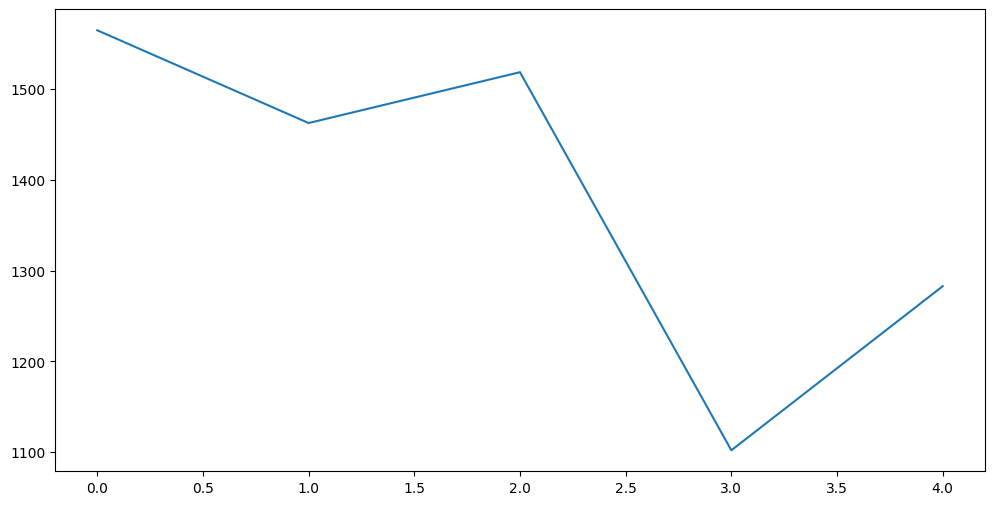

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(scaled_data)), scaler.inverse_transform(scaled_data), label='Actual Prices')


# Plot training and testing predictions